<a href="https://colab.research.google.com/github/rishiimortal/Calories_burnt_ML/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

# Set the seaborn style
sns.set_style('whitegrid')

In [ ]:
import pandas as pd

df = pd.read_csv('exercise.csv')
df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [ ]:
df.shape

(15000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

EDA

In [ ]:
cat_col=[col for col in df.columns if df[col].dtype=='O']
cat_col

['Gender']

In [ ]:
df["Gender"].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

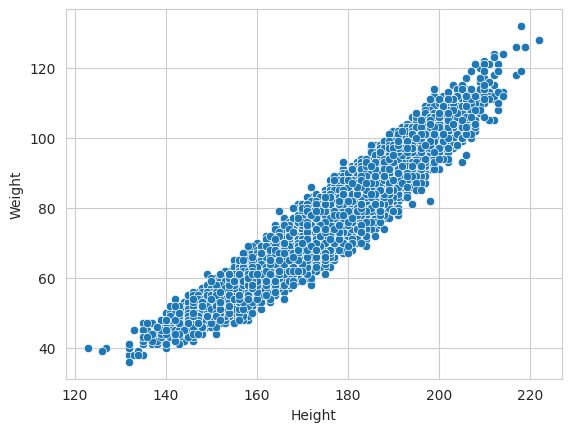

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
# Assuming df is DataFrame containing 'Height' and 'Weight' columns
sns.scatterplot(x=df['Height'], y=df['Weight'])
plt.show()


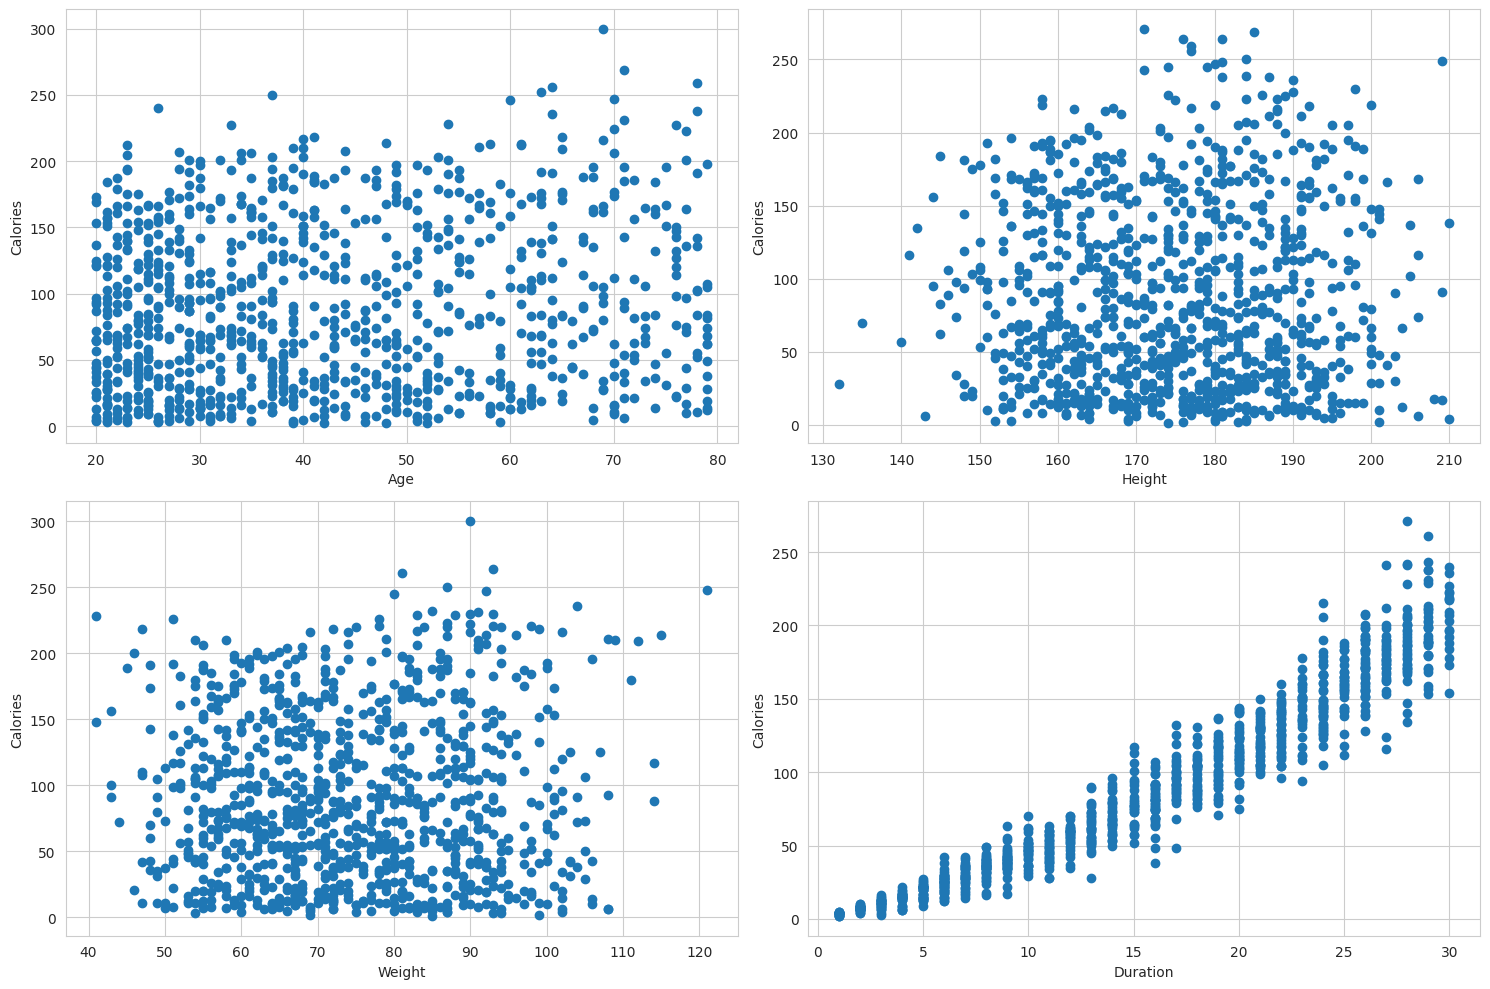

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = df.sample(1000)
    plt.scatter(x[col], x['Calories'])  # Using plt.scatter instead of sns.scatterplot
    plt.xlabel(col)
    plt.ylabel('Calories')
plt.tight_layout()
plt.show()


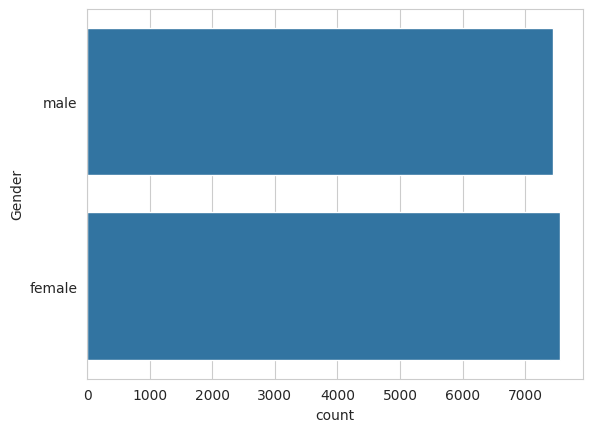

In [ ]:
sns.countplot(df['Gender'])
plt.show()

In [ ]:
#pd.get_dummies(df["Gender"],drop_first=True)


In [ ]:
categorical = df[cat_col]
categorical.head()


,Gender
0,male
1,female
2,male
3,female
4,female


In [ ]:
categorical = pd.get_dummies(categorical["Gender"],drop_first=True)

In [ ]:

categorical

,male
0,1
1,0
2,1
3,0
4,0
...,...
14995,0
14996,0
14997,0
14998,1


In [ ]:
Num_col = [col for col in df.columns if df[col].dtype != "O"]
Num_col

['User_ID',
 'Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp',
 'Calories']

In [ ]:
df[Num_col].shape

(15000, 8)

In [ ]:

Numerical = df[Num_col]
Numerical.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,68,190,94,29,105,40.8,231
1,14861698,20,166,60,14,94,40.3,66
2,11179863,69,179,79,5,88,38.7,26
3,16180408,34,179,71,13,100,40.5,71
4,17771927,27,154,58,10,81,39.8,35


In [ ]:
Numerical.shape


(15000, 8)

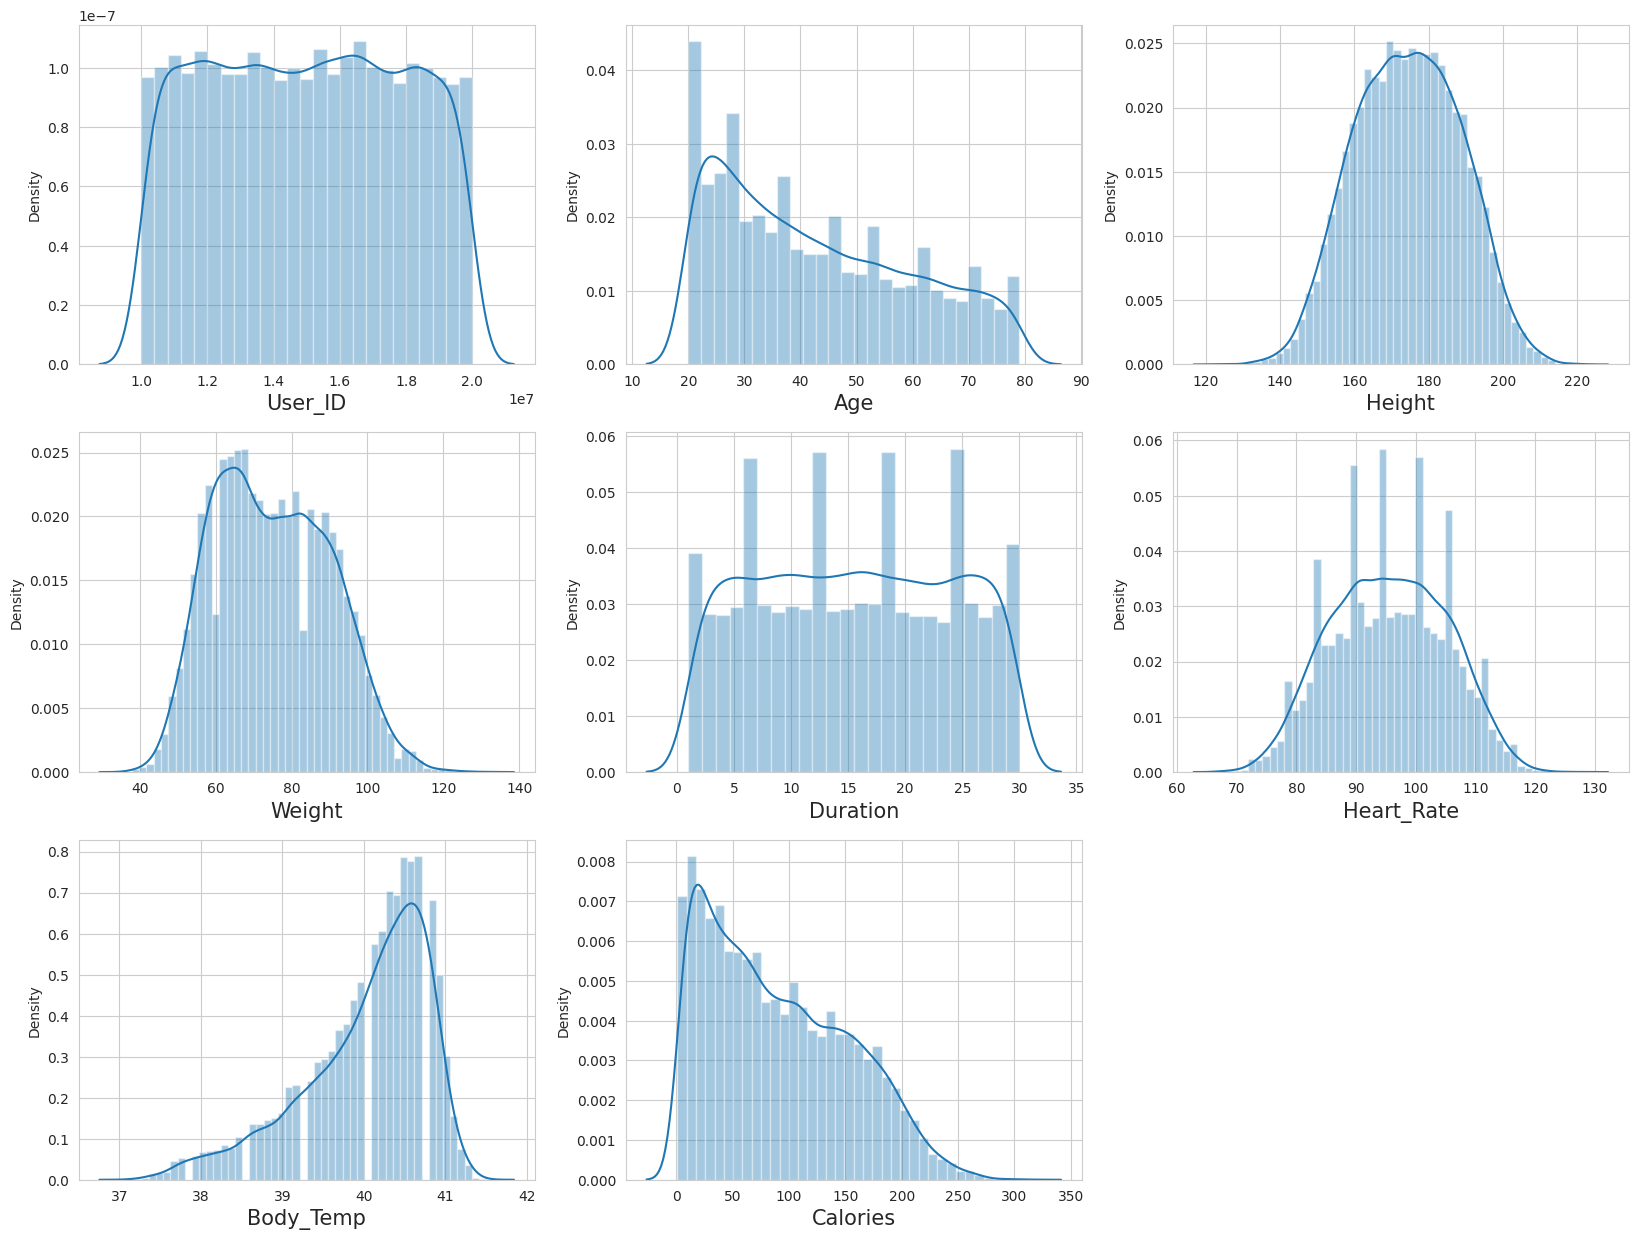

In [ ]:
plt.figure(figsize=(20,15))

for i, column in enumerate(Numerical.columns, start=1):
    if i <= 8:
        plt.subplot(3, 3, i)
        sns.distplot(Numerical[column])
        plt.xlabel(column, fontsize=15)

plt.show()


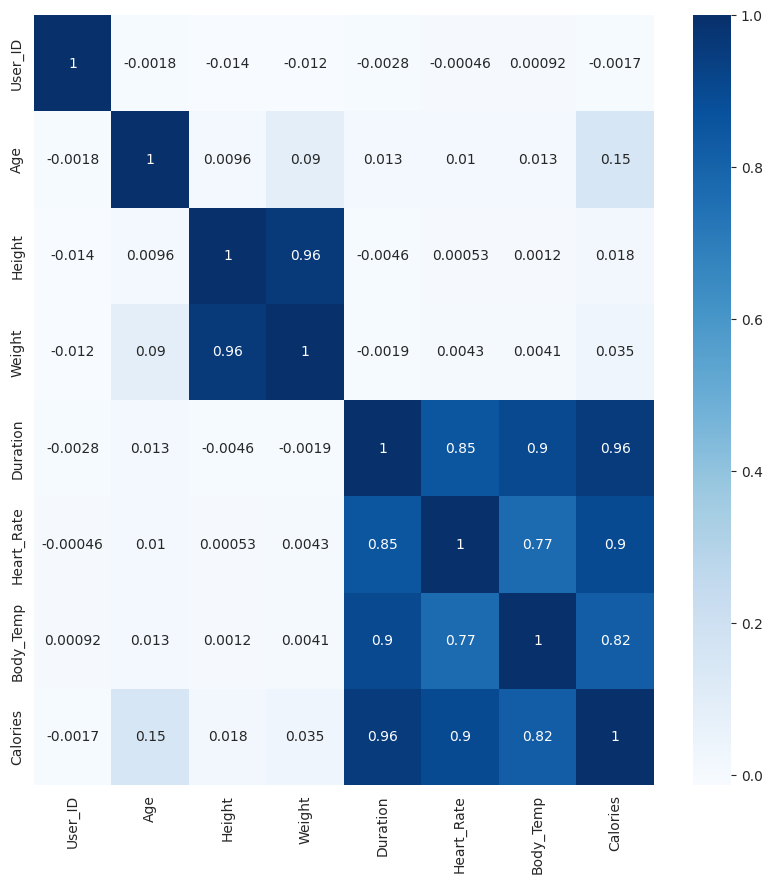

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(Numerical.corr(), cmap='Blues', annot=True)
plt.show()

In [ ]:
data = pd.concat([categorical,Numerical],axis=1)

In [ ]:
data.head()

,male,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,14733363,68,190,94,29,105,40.8,231
1,0,14861698,20,166,60,14,94,40.3,66
2,1,11179863,69,179,79,5,88,38.7,26
3,0,16180408,34,179,71,13,100,40.5,71
4,0,17771927,27,154,58,10,81,39.8,35


<Axes: >

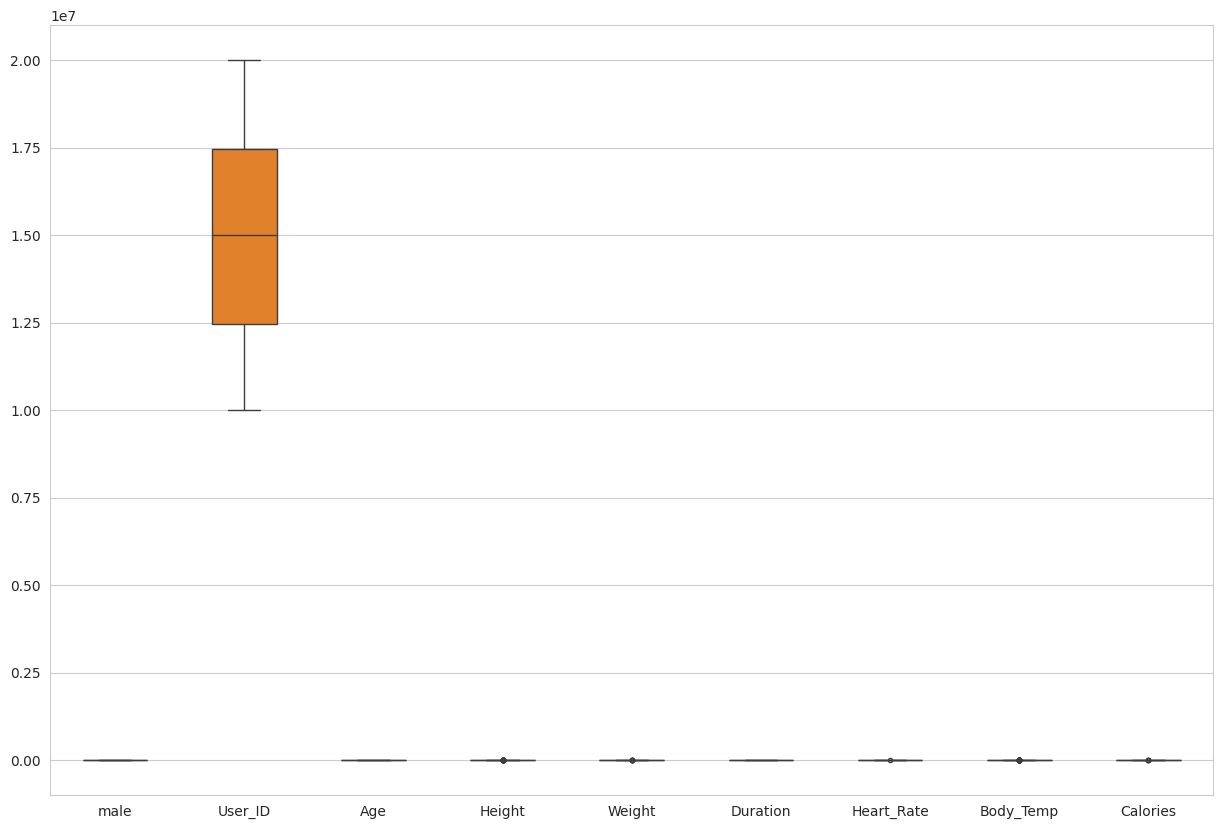

In [ ]:
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data=data,width = 0.5,fliersize = 3,ax=ax)


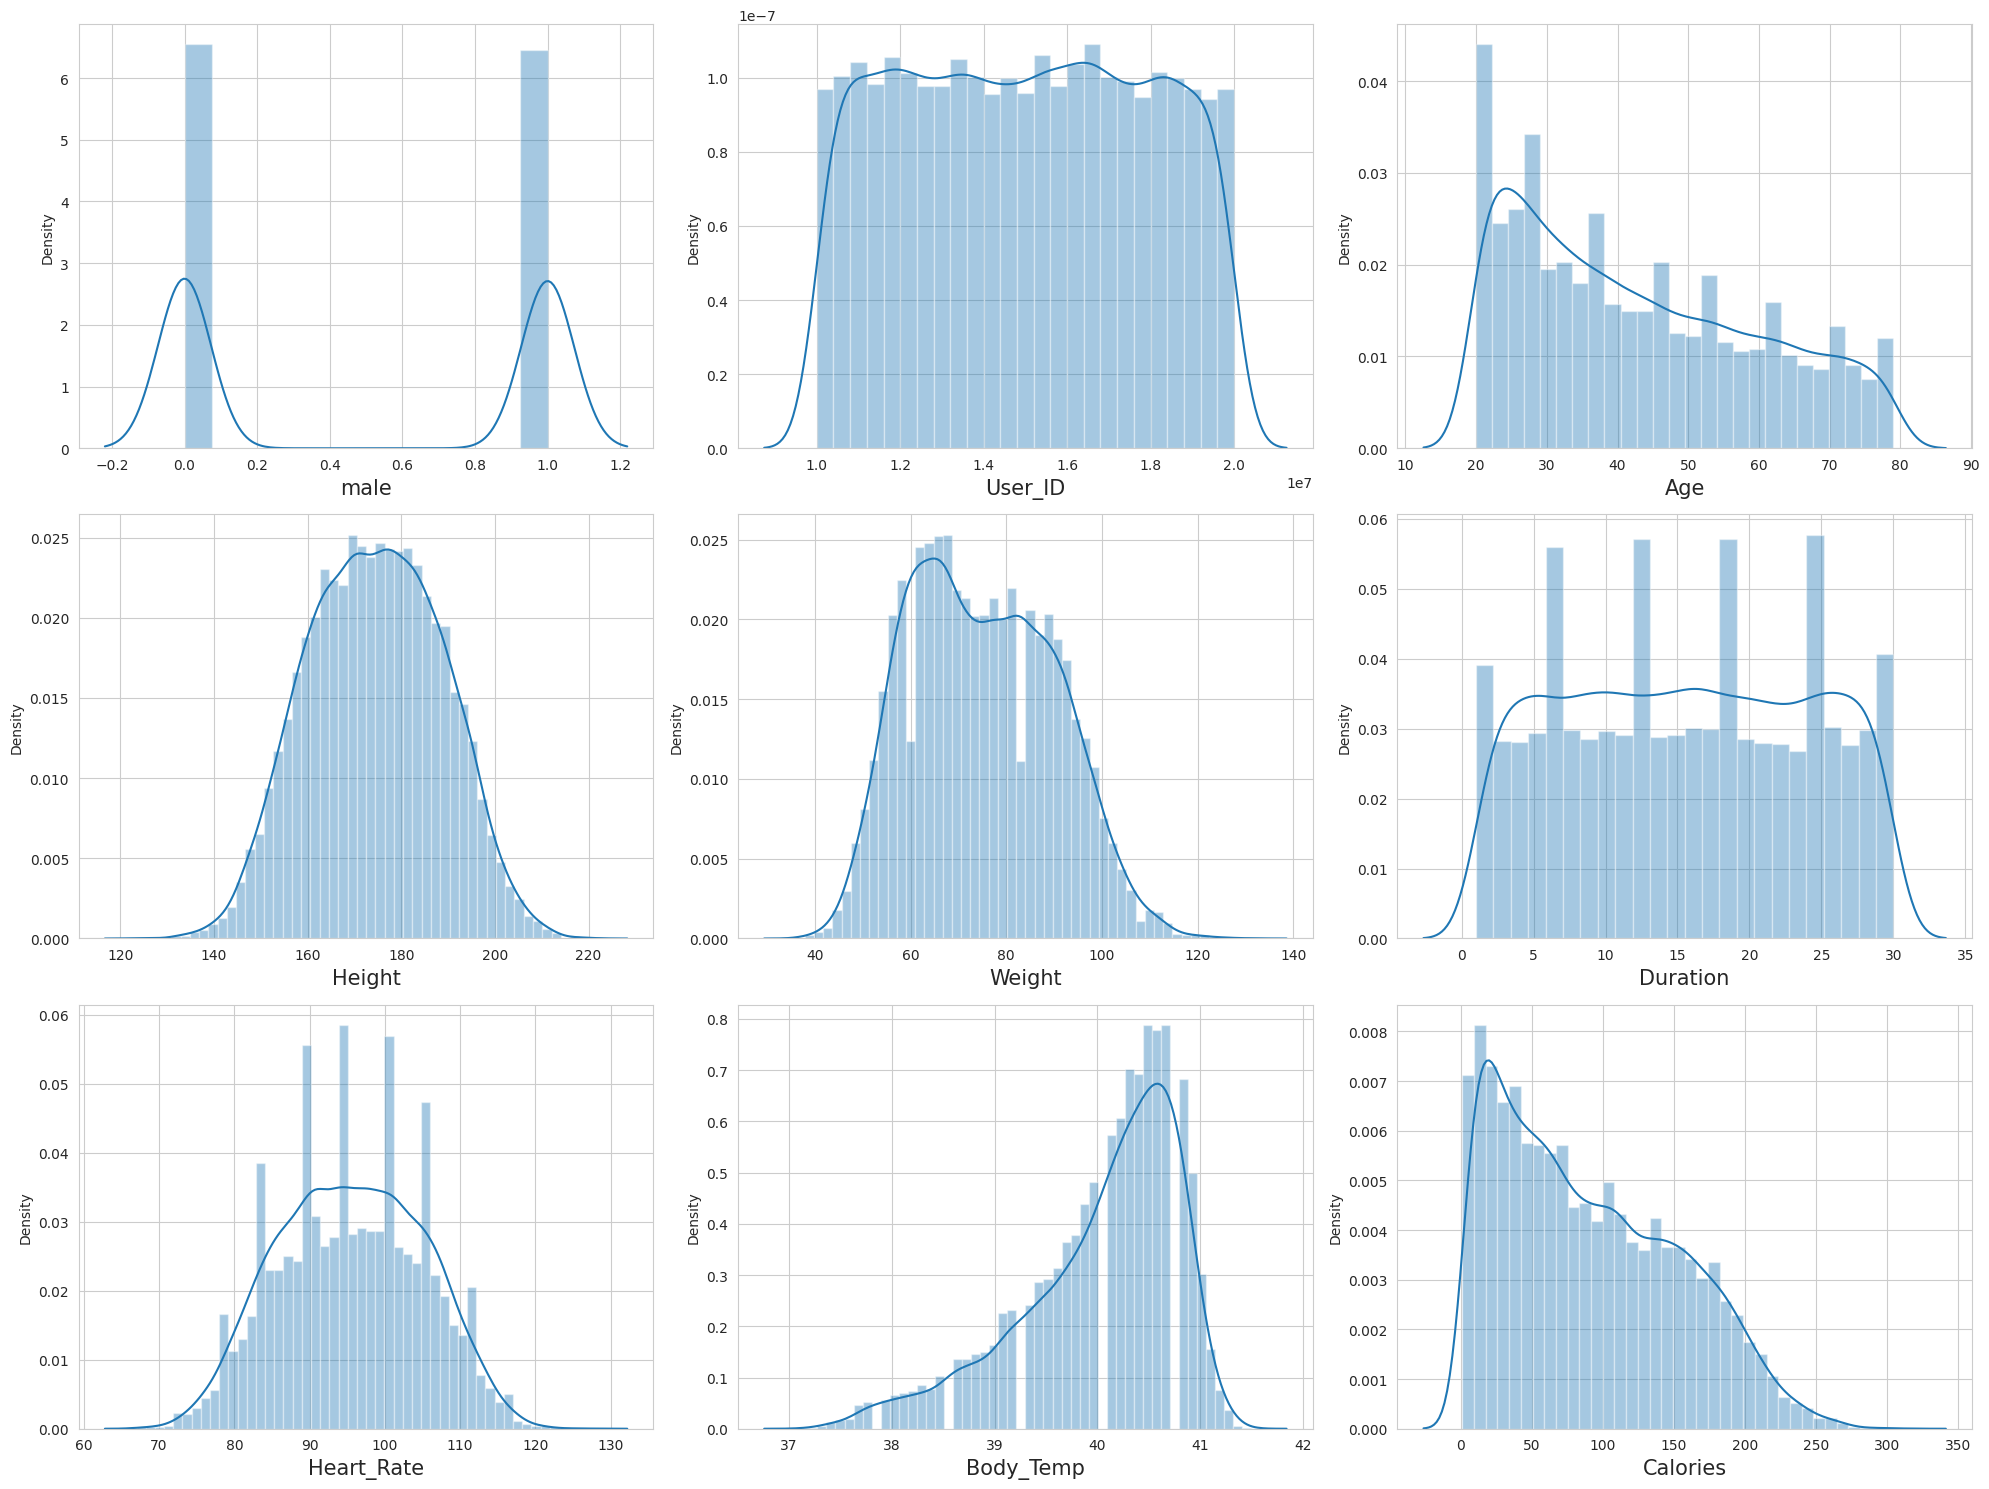

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

for i, column in enumerate(data.columns[:9], start=0):
    sns.distplot(data[column], ax=axs[i//3, i%3])
    axs[i//3, i%3].set_xlabel(column, fontsize=15)

plt.tight_layout()
plt.show()


In [ ]:
data.columns


Index(['male', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [ ]:
X = data.drop(columns = ["Calories"],axis = 1)
y = data["Calories"]

In [ ]:

X.head()

,male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190,94,29,105,40.8
1,0,20,166,60,14,94,40.3
2,1,69,179,79,5,88,38.7
3,0,34,179,71,13,100,40.5
4,0,27,154,58,10,81,39.8


In [ ]:

y.head()


0    231
1     66
2     26
3     71
4     35
Name: Calories, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

Machine learning tools

In [ ]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)


Shape of X Train:  (12000, 7)
Shape of X Test:  (3000, 7)
Shape of y Train:  (12000,)
Shape of y Test:  (3000,)


In [ ]:
import seaborn as sns
import numpy as np
from sklearn import metrics

def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Score : {}'.format(model.score(X_train, y_train)))

    y_prediction = model.predict(X_test)
    print('Predictions are: \n{}'.format(y_prediction))
    print('\n')

    r2_score = metrics.r2_score(y_test, y_prediction)
    print('R2 score: {}'.format(r2_score))

    print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
    print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

    sns.displot(y_test - y_prediction)  # Changed to displot for the distribution plot

# Assuming X_train, X_test, y_train, and y_test are defined elsewhere in your code


Score : 0.9995777219604748
predictions are: 
 [172.07645  195.7858    51.708874 ... 121.50776   19.239851 214.43597 ]


r2 score: 0.9988678909361673
MAE: 1.4981198125282924
MSE: 4.568956111227719
RMSE: 2.1375116634132594


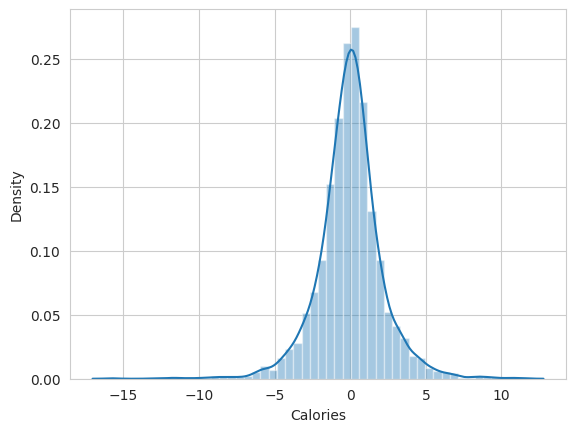

In [ ]:
regression = predict(XGBRegressor())
regression

In [ ]:
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

Score : 0.9671621074066676
predictions are: 
 [170.67646027 192.08857813  56.14796403 ... 129.66570069   2.4152784
 191.99081681]


r2 score: 0.9672937151257296
MAE: 8.441513553849697
MSE: 131.9957457508168
RMSE: 11.48894014915287


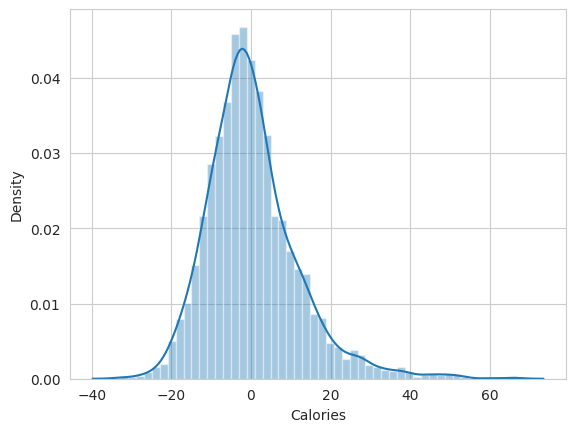

In [ ]:
predict(LinearRegression())

Score : 1.0
predictions are: 
 [166. 194.  52. ... 123.  20. 207.]


r2 score: 0.9931988557500656
MAE: 3.3986666666666667
MSE: 27.448
RMSE: 5.239083889383716


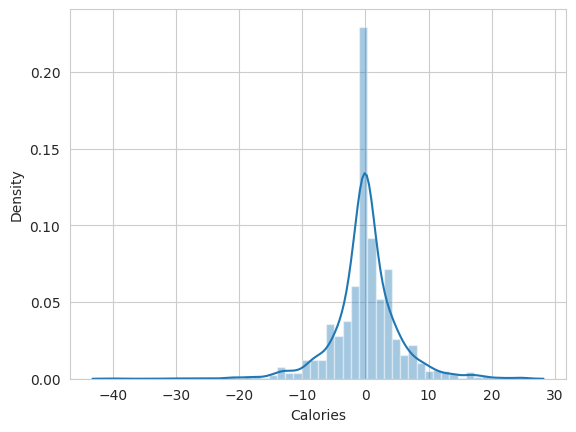

In [ ]:
predict(DecisionTreeRegressor())

Score : 0.9996959703283341
predictions are: 
 [169.96 193.57  52.8  ... 120.59  19.81 213.95]


r2 score: 0.9982188304887142
MAE: 1.7065866666666667
MSE: 7.188428733333334
RMSE: 2.68112452775572


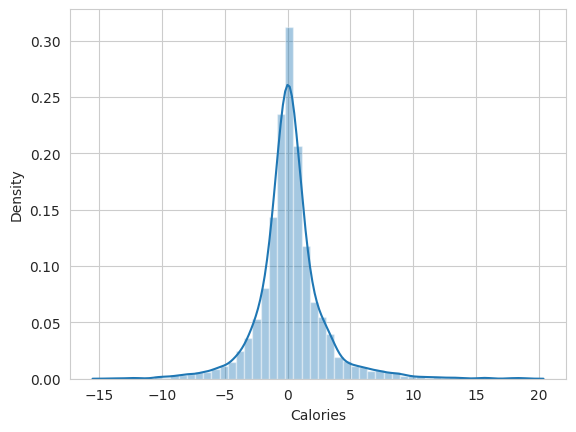

In [ ]:
predict(RandomForestRegressor())